In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from copy import deepcopy

from isingCA_global import isingCA

C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHANNELS=1 # number of channels in grid
RADIUS=1
TEMP_ADAPT=True
def init_isingCA():    
    BETA = 1. / (10 ** np.random.rand())
    # BETA = (1 / 2.269)
    ca = isingCA(CHANNELS=CHANNELS, BETA=BETA, RADIUS=RADIUS, TEMP_ADAPT=TEMP_ADAPT).cuda() 
    
    return ca

ca = init_isingCA().eval()

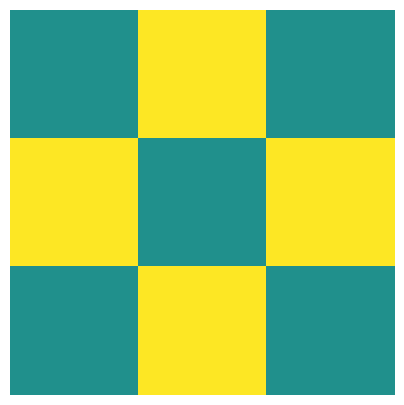

In [3]:
kernels = torch.cat([k for k in ca.rule.nearest_neighbours], dim=0).cpu().detach().numpy()
# kernels = totalistic(ca.rule.kernels[0].cpu().detach()).numpy()

num_plot_kernels = np.min([6, CHANNELS])
fig, axes = plt.subplots(1, num_plot_kernels, figsize=(5, 5))

if CHANNELS == 1:
    kplot = kernels[0, :, :]
    kmax = np.max(np.abs(kplot))
    axes.imshow(kplot, vmin=-kmax, vmax=kmax)
    axes.axis('off')
    
else:
    for j in range(num_plot_kernels):
        kplot = kernels[j, :, :]
        kmax = np.max(np.abs(kplot))
        axes[j].imshow(kplot, vmin=-kmax, vmax=kmax)
        axes[j].axis('off')

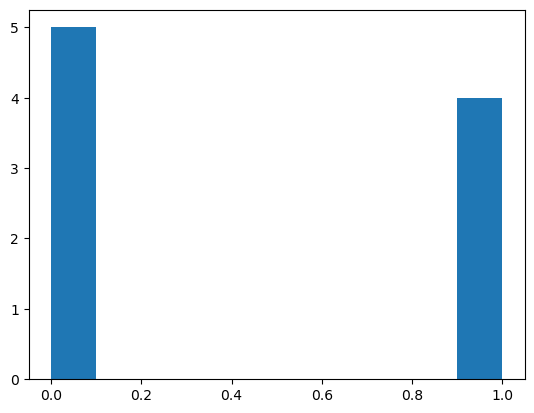

In [4]:
plt.hist(kernels.reshape(-1));

In [59]:
RESX = RESY = 320
timesteps = 20000
num_iters = 30
export_imgs = False

m_s = []
t_s = []

# Xi = []
# C = []
for j in tqdm(range(num_iters)):
    ca = init_isingCA()
    state = ca.initGrid((RESX, RESY))
    m = []
    t = []
    
    Mm = 0.
    M2m = 0.
    Em = 0.
    E2m = 0.
    for i in range(timesteps):
        state, E = ca.forward(state, return_E=True)

        if export_imgs:
            imgs.append(nx)
        
        energy = E.cpu().numpy()
        magnetization = state[0, 0].mean().cpu().numpy()
        temperature = 1. / ca.rule.beta.cpu().numpy()[0]
        
        # Mm += magnetization
        # M2m += magnetization ** 2
        # Em += energy
        # E2m += energy ** 2

        m.append(magnetization)
        t.append(temperature)
    
#     Mm /= timesteps
#     M2m /= timesteps
#     Em /= timesteps
#     E2m /= timesteps
    
#     Xi.append( (E2m - Em * Em) * (1 / temperature) ** 2 )
#     C.append( (M2m - Mm * Mm) * (1 / temperature) )
        
    m_s.append(m)
    t_s.append(t)

100%|██████████| 30/30 [06:47<00:00, 13.57s/it]


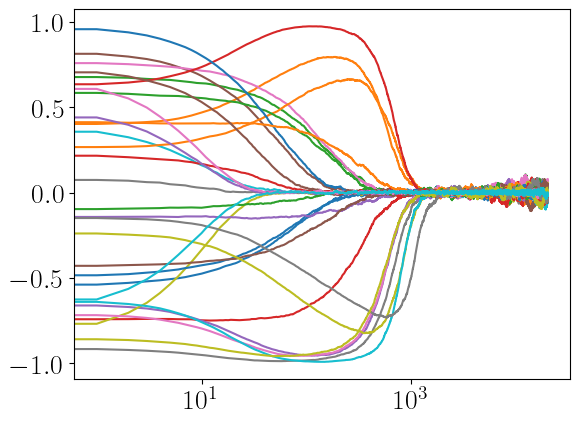

In [60]:
plt.plot(np.array(m_s).T);
plt.xscale('log')

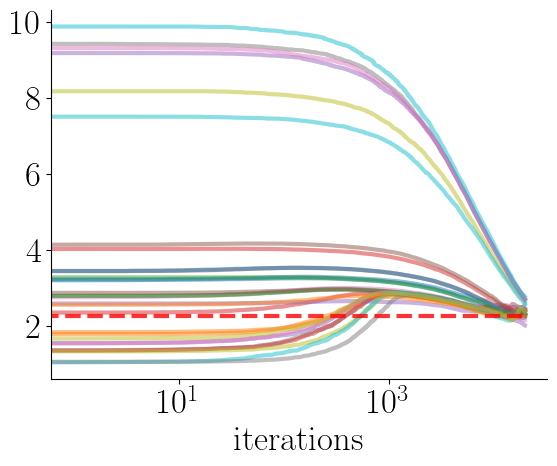

In [61]:
import seaborn as sns
plt.rcParams.update({'font.size': 25})
T_c = 2.2691
extent = 2.26

fig, ax1 = plt.subplots()

ax1.plot(np.array(t_s).T, alpha=0.5, lw=3); 
ax1.plot([0, len(t_s[0])], [T_c, T_c], 'r--', lw=3, alpha=0.8)

# plt.yscale('log')
# ax1.set_ylim([T_c - extent, T_c + extent])
ax1.set_xlabel('iterations')
ax1.set_xscale('log')

sns.despine()
# plt.xlim([0, 5000])

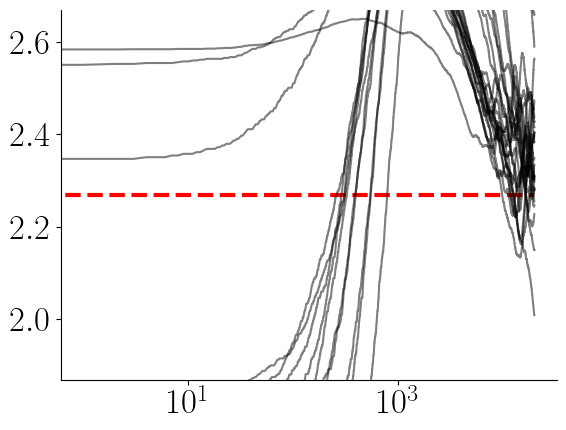

In [62]:
import seaborn as sns

T_c = 2.2691
extent = 0.4

plt.plot([0, len(t_s[0])], [T_c, T_c], 'r--', lw=3)
plt.plot(np.array(t_s).T, 'k', alpha=0.5); 
# plt.yscale('log')
plt.ylim([T_c - extent, T_c + extent])
plt.xscale('log')

sns.despine()
# plt.xlim([0, 5000])

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x20baadf4b80>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x20baade8c40>)

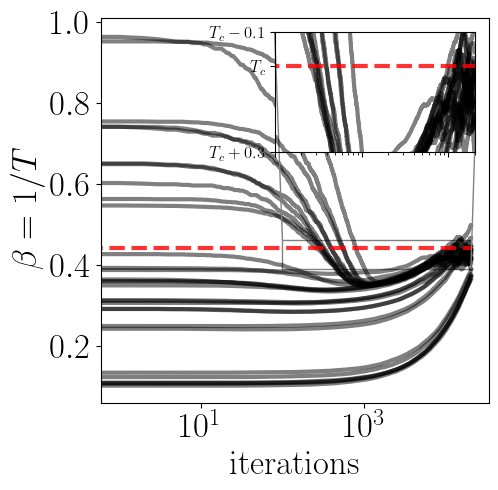

In [63]:
import matplotlib.pyplot as plt
from matplotlib import rc

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

fig, ax = plt.subplots(figsize=[5,5])
plt.rcParams.update({'font.size': 20})

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams['text.usetex'] = True

# extent = [-3, 4, -4, 3]
# ax.imshow(Z2, extent=extent, interpolation="nearest",
#           origin="lower")
ax.plot(1. / np.array(t_s).T, 'k', alpha=0.5, lw=3); 
ax.plot([0, len(t_s[0])], [1./ T_c, 1./ T_c], 'r--', lw=3, alpha=0.8)
ax.set_xlabel('iterations')
ax.set_ylabel(fr'$\beta=1/T$')

ax.set_xscale('log')

axins = inset_axes(ax, 2, 1.2,  loc=1) # zoom = 6
axins.plot(1./ np.array(t_s).T, 'k', alpha=0.5, lw=3); 
plt.plot([0, len(t_s[0])], [1./T_c, 1./T_c], 'r--', lw=3, alpha=0.8)

# sub region of the original image
T_c = 2.2691
extent = [0.3, 0.1]

y1, y2 = 1./(T_c + extent[0]), 1./(T_c - extent[1])
axins.set_ylim(y1, y2)
axins.set_xlim(100, len(t_s[0]))
axins.set_xscale('log')

plt.xticks(visible=False)
# plt.yticks(ticks = [1./ (T_c - extent), 1./(T_c), 1./(T_c + extent)], labels=[fr'$T_c - {extent}$', r'$T_c$', fr'$T_c + {extent}$'], fontsize=12)
plt.yticks(ticks = [1./ (T_c + extent[0]), 1./(T_c), 1./(T_c - extent[1])], labels=[fr'$T_c + {extent[0]}$', r'$T_c$', fr'$T_c - {extent[1]}$'], fontsize=12)


# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.draw()
# plt.show()

# plt.savefig('figs/isingCA_global_criticality.pdf', bbox_inches='tight')

In [64]:
RESX = RESY = 640
timesteps = 25000

capture_frames = [1, 5000, 15000, timesteps]

ca = init_isingCA()
state = ca.initGrid((RESX, RESY))

imgs = []
imgs_t = []
for i in tqdm(range(timesteps)):
    state = ca.forward(state)
    
    if (i + 1) in capture_frames:
        nx = state[0, 0].cpu().numpy()
        nx_t = ca.rule.beta.cpu().numpy()[0]
        imgs.append(nx)
        imgs_t.append(nx_t)

100%|██████████| 25000/25000 [00:10<00:00, 2383.87it/s]


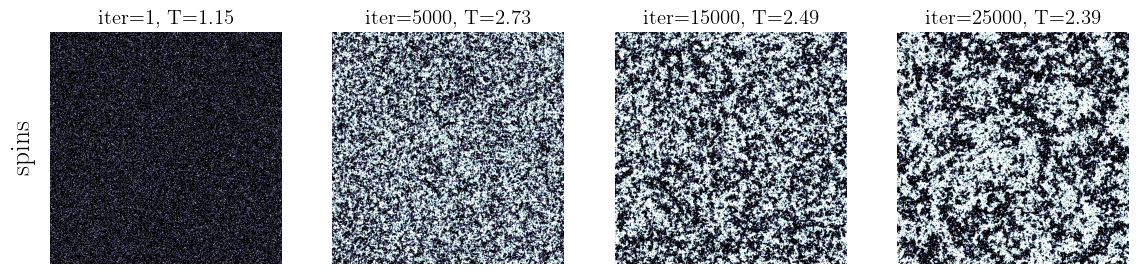

In [103]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams['text.usetex'] = True

fig, axes = plt.subplots(1, len(imgs), figsize=(12, 3))

for i in range(len(imgs)):
    axes[i].imshow(imgs[i], cmap='bone');
    # axes[i].axis('off')
    axes[i].set_title(fr'iter={capture_frames[i]}, T={1. / imgs_t[i]:.2f}', fontsize=15)
    
    
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])
    
    axes[i].tick_params(bottom=False, left=False)
    
    if i == 0:
        axes[0].set_ylabel('spins')
        
sns.despine(top=True, right=True, left=True, bottom=True)
# plt.tight_layout()
# plt.savefig('figs/ising_global_convergence.pdf', bbox_inches='tight')

(0.0, 2000.0)

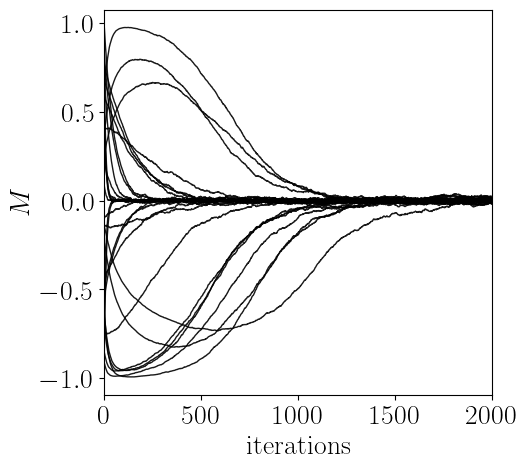

In [89]:
plt.figure(figsize=(5, 5))

plt.plot(np.array(m_s).T, 'k', alpha=0.9, lw=1.);
# plt.plot(np.array(m_s).T[:1650, :], 'k', alpha=.3, lw=1.);
plt.ylabel(r'$M$')
plt.xlabel(r'iterations')
# plt.xscale('log')
plt.xlim([0, 2000])
# plt.savefig('figs/isingCA_global_magnetization.pdf', bbox_inches='tight')

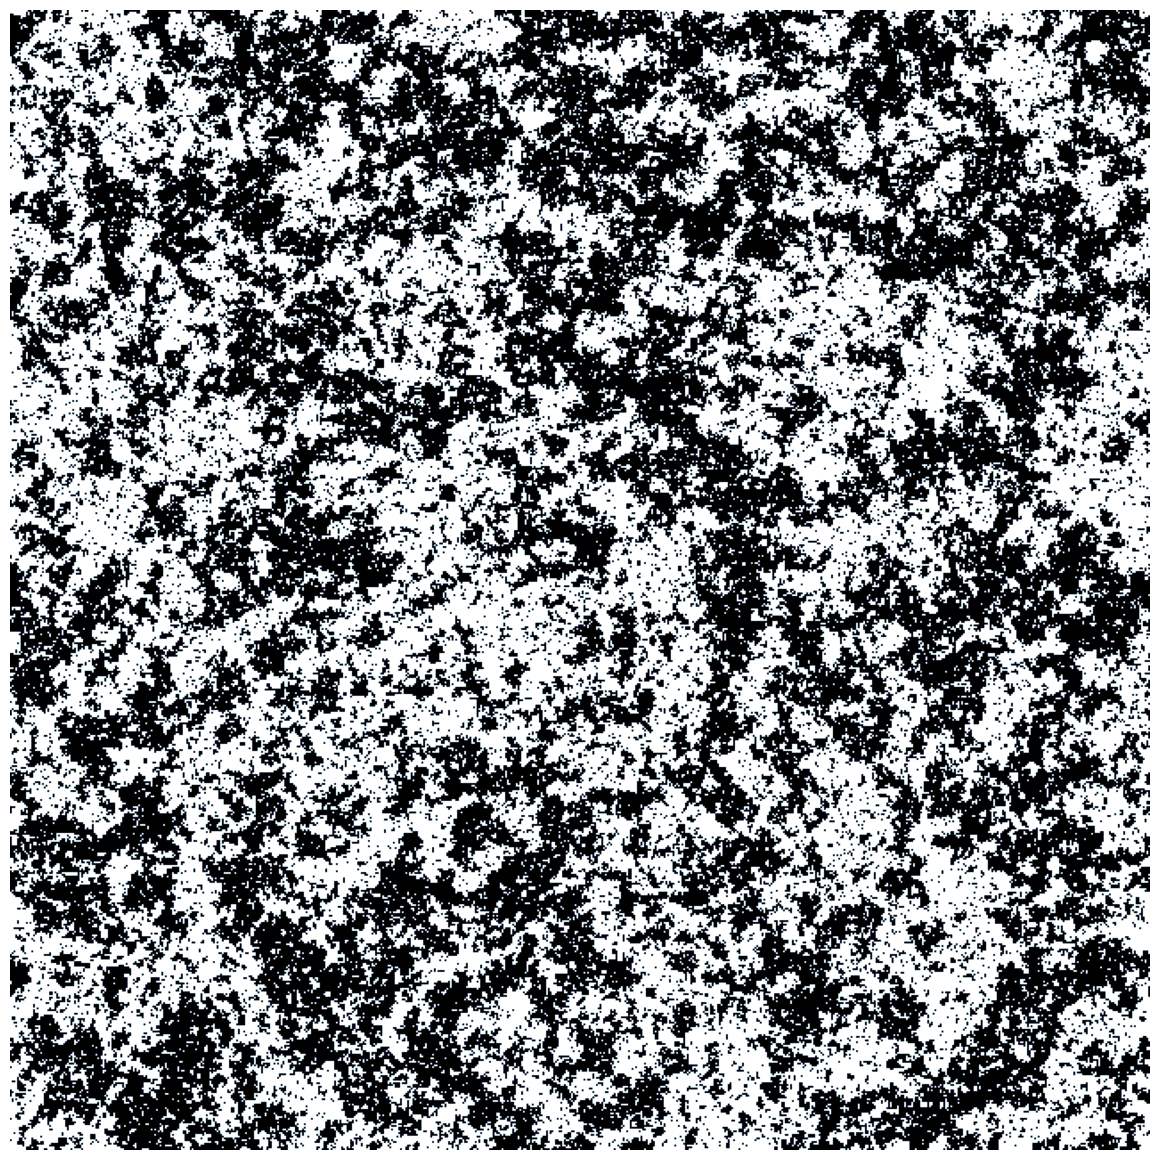

In [101]:
cmap = 'magma'
idx = -1

plt.figure(figsize=(12, 12))
plt.imshow(imgs[idx], cmap='bone')
plt.axis('off')


plt.tight_layout()
# plt.savefig('figs/hires_spins_temps.pdf', bbox_inches='tight')

In [108]:
test = {'test': 0.}

'test' in test

True